In [1]:
from random import randint
import glob
from faker import Faker
import numpy as np
import seaborn as sns
sns.set_theme(style="whitegrid")
import pandas as pd
import sys
import os

fake = Faker()
Faker.seed(0)
path = '../AMLSim/outputs/10K'
csvList = sorted(glob.glob('../AMLSim/outputs/10K/*.csv'))
print(csvList)


['../AMLSim/outputs/10K\\accountMapping.csv', '../AMLSim/outputs/10K\\accounts.csv', '../AMLSim/outputs/10K\\alert_accounts.csv', '../AMLSim/outputs/10K\\alert_transactions.csv', '../AMLSim/outputs/10K\\cash_tx.csv', '../AMLSim/outputs/10K\\individuals-bulkload.csv', '../AMLSim/outputs/10K\\organizations-bulkload.csv', '../AMLSim/outputs/10K\\resolvedentities.csv', '../AMLSim/outputs/10K\\sar_accounts.csv', '../AMLSim/outputs/10K\\transactions.csv']


In [2]:
df = pd.read_csv(csvList[0])


In [3]:
# df.bank_id.unique()


In [4]:
pd.read_csv(csvList[1]).columns

Index(['acct_id', 'dsply_nm', 'type', 'acct_stat', 'acct_rptng_crncy',
       'prior_sar_count', 'branch_id', 'open_dt', 'close_dt',
       'initial_deposit', 'tx_behavior_id', 'bank_id', 'first_name',
       'last_name', 'street_addr', 'city', 'state', 'country', 'zip', 'gender',
       'birth_date', 'ssn', 'lon', 'lat'],
      dtype='object')

In [5]:
accountMapping = pd.read_csv(csvList[8])
accountMapping.head()

,ALERT_ID,MAIN_ACCOUNT_ID,MAIN_CUSTOMER_ID,EVENT_DATE,ALERT_TYPE,ACCOUNT_TYPE,IS_SAR
0,0,2489,C_2489,20170101,fan_in,INDIVIDUAL,YES
1,1,9640,C_9640,20170111,fan_in,INDIVIDUAL,YES
2,2,9684,C_9684,20170109,fan_out,INDIVIDUAL,YES
3,3,5371,C_5371,20170108,fan_out,INDIVIDUAL,YES
4,4,4041,C_4041,20170110,fan_in,INDIVIDUAL,YES


In [6]:
accounts = pd.read_csv(csvList[1])
accounts.head()


,acct_id,dsply_nm,type,acct_stat,acct_rptng_crncy,prior_sar_count,branch_id,open_dt,close_dt,initial_deposit,...,street_addr,city,state,country,zip,gender,birth_date,ssn,lon,lat
0,0,C_0,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,92221.09,...,NaN,NaN,NaN,US,NaN,NaN,NaN,NaN,NaN,NaN
1,1,C_1,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,87897.72,...,NaN,NaN,NaN,US,NaN,NaN,NaN,NaN,NaN,NaN
2,2,C_2,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,71028.58,...,NaN,NaN,NaN,US,NaN,NaN,NaN,NaN,NaN,NaN
3,3,C_3,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,62945.84,...,NaN,NaN,NaN,US,NaN,NaN,NaN,NaN,NaN,NaN
4,4,C_4,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,75563.74,...,NaN,NaN,NaN,US,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
## variables
gender = 0
fname = []
lname = []
genderArr = []
city = []
str_address = []
birthdates = []
# full_address = []
temp = []
zip_code = []
state = []
ssn_set = set()
ssn_list = []
display_name = []

def getAddress():
    retval = []
    try:
        temp = fake.address()
        temp = temp.split("\n")
        retval.append(temp[0]) ## appends street address
        temp = temp[1].split(",")
        retval.append(temp[0]) ## appends city
        temp = temp[1].split()
        retval.append(temp[0]) ## appends state
        retval.append(temp[1]) ## appends zip code

        error = False
    except:
        error = True

    return error, retval

def get_ssn():
    retval = fake.ssn()
    if retval in ssn_set:
        error = True
        return error, retval
    else:
        error = False
        return error, retval

for name in range(len(accounts)):

    gender = randint(0,1)

    err, ret = getAddress()

    while err:
        err, ret = getAddress()

    str_address.append(ret[0])
    city.append(ret[1])
    state.append(ret[2])
    zip_code.append(ret[3])
    birthdates.append(fake.date_of_birth(minimum_age = 18, maximum_age = 80))
    
    err, ret = get_ssn()
    while err:
        err, ret = get_ssn()

    ssn_set.add(ret)
    
    if gender == 1:
        genderArr.append('M')
        fname.append(fake.first_name_male())
        lname.append(fake.last_name())
        # display_name.append(fname[-1] + lname[-1])
        # break

        
    else:
        genderArr.append('F')
        fname.append(fake.first_name_female())
        lname.append(fake.last_name())
        # display_name.append(fname[-1] + lname[-1])
        # break
    display_name.append(fname[-1] + lname[-1])
    # print(display_name[-1])

ssn_list = list(ssn_set)


accounts['gender'] = pd.Series(genderArr)
accounts['first_name'] = pd.Series(fname)
accounts['last_name'] = pd.Series(lname)
accounts['street_addr'] = pd.Series(str_address)
accounts['city'] = pd.Series(city)
accounts['state'] = pd.Series(state)
accounts['zip'] = pd.Series(zip_code)
accounts['ssn'] = pd.Series(ssn_list)
accounts['birth_date'] = pd.Series(birthdates)
accounts['dsply_nm'] = pd.Series(display_name)


In [8]:
transactions = pd.read_csv(csvList[-1])
transactions.head()

,tran_id,orig_acct,bene_acct,tx_type,base_amt,tran_timestamp,is_sar,alert_id
0,1,3618,2780,TRANSFER,915.43,2017-01-01T00:00:00Z,False,-1
1,2,2093,2236,TRANSFER,886.43,2017-01-01T00:00:00Z,False,-1
2,3,4867,2186,TRANSFER,454.24,2017-01-01T00:00:00Z,False,-1
3,4,9308,8575,TRANSFER,483.24,2017-01-01T00:00:00Z,False,-1
4,5,4850,5391,TRANSFER,846.34,2017-01-01T00:00:00Z,False,-1


False    88107
True       714
Name: is_sar, dtype: int64


Text(0.5, 1.0, 'Data Imbalance')

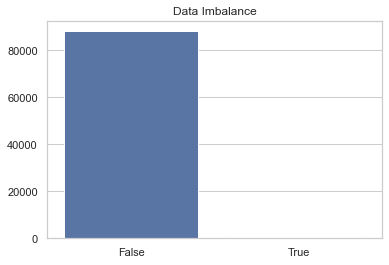

In [9]:
x = transactions['is_sar'].value_counts().index
y = transactions['is_sar'].value_counts().values
print(transactions['is_sar'].value_counts())
ax = sns.barplot(x=x, y=y)
ax.set_title('Data Imbalance')


   tran_id  orig_acct  bene_acct   tx_type  base_amt        tran_timestamp  \
0        1       3618       2780  TRANSFER    915.43  2017-01-01T00:00:00Z   
1        2       2093       2236  TRANSFER    886.43  2017-01-01T00:00:00Z   
2        3       4867       2186  TRANSFER    454.24  2017-01-01T00:00:00Z   
3        4       9308       8575  TRANSFER    483.24  2017-01-01T00:00:00Z   
4        5       4850       5391  TRANSFER    846.34  2017-01-01T00:00:00Z   

   is_sar  alert_id  
0   False        -1  
1   False        -1  
2   False        -1  
3   False        -1  
4   False        -1  


<AxesSubplot:xlabel='orig_acct', ylabel='Density'>

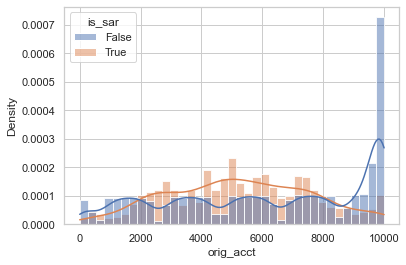

In [10]:
print(transactions.head())
sns.histplot(data=transactions, x='orig_acct', hue='is_sar',
             stat='density', common_norm=False, kde=True)


<AxesSubplot:xlabel='bene_acct', ylabel='Density'>

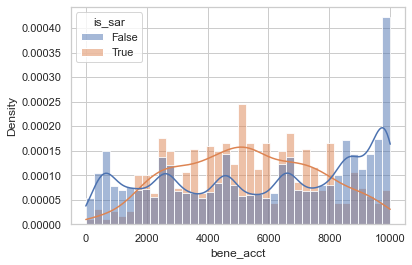

In [11]:

sns.histplot(data=transactions, x='bene_acct', hue='is_sar',
             stat='density', common_norm=False, kde=True)

<AxesSubplot:xlabel='base_amt', ylabel='Density'>

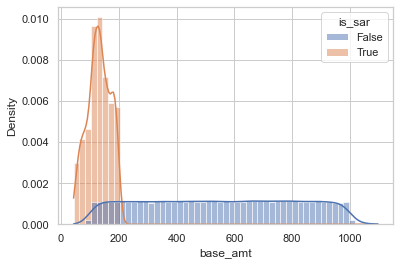

In [12]:
sns.histplot(data=transactions, x='base_amt', hue='is_sar',
             stat='density', common_norm=False, kde=True)


<AxesSubplot:xlabel='orig_acct', ylabel='Density'>

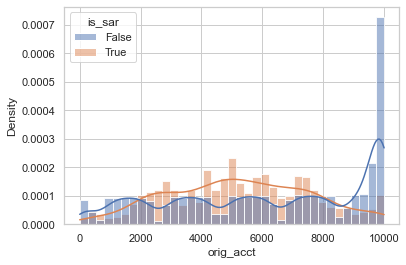

In [13]:

sns.histplot(data=transactions, x='orig_acct', hue='is_sar',
             stat='density', common_norm=False, kde=True)


<AxesSubplot:ylabel='Count'>

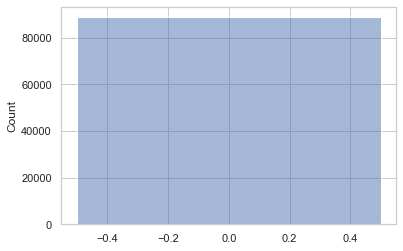

In [14]:
tx_type = pd.Categorical(transactions['tx_type'])
sns.histplot(data=tx_type.codes, kde = True)


<AxesSubplot:xlabel='tran_timestamp', ylabel='Density'>

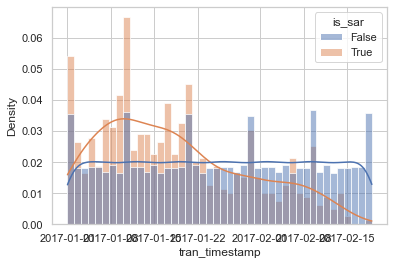

In [15]:
transactions['tran_timestamp'] = pd.to_datetime(transactions['tran_timestamp'])
sns.histplot(data=transactions, x='tran_timestamp', hue='is_sar',
            stat='density', common_norm=False, kde=True)


In [16]:
orig_acct = pd.merge(transactions, accounts, how='left', left_on=['orig_acct'], right_on=['acct_id'])
pd.set_option('display.max_columns', None)
orig_acct.head()


,tran_id,orig_acct,bene_acct,tx_type,base_amt,tran_timestamp,is_sar,alert_id,acct_id,dsply_nm,type,acct_stat,acct_rptng_crncy,prior_sar_count,branch_id,open_dt,close_dt,initial_deposit,tx_behavior_id,bank_id,first_name,last_name,street_addr,city,state,country,zip,gender,birth_date,ssn,lon,lat
0,1,3618,2780,TRANSFER,915.43,2017-01-01 00:00:00+00:00,False,-1,3618,AndreWashington,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,99021.16,5,bank_1,Andre,Washington,4023 Cook Locks Apt. 819,Adamsview,LA,US,79724,M,1966-05-07,708-07-3066,NaN,NaN
1,2,2093,2236,TRANSFER,886.43,2017-01-01 00:00:00+00:00,False,-1,2093,BruceKing,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,60365.70,1,bank_1,Bruce,King,278 Laura Isle,Williamchester,UT,US,48466,M,1973-08-01,186-49-0131,NaN,NaN
2,3,4867,2186,TRANSFER,454.24,2017-01-01 00:00:00+00:00,False,-1,4867,AmySmith,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,80826.32,3,bank_2,Amy,Smith,3000 Hamilton Common,East Vicki,DC,US,98017,F,1954-01-01,879-62-4988,NaN,NaN
3,4,9308,8575,TRANSFER,483.24,2017-01-01 00:00:00+00:00,False,-1,9308,JasonBishop,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,51060.01,4,bank_4,Jason,Bishop,181 Lopez Lakes Suite 190,Livingstonborough,PA,US,60863,M,1954-11-27,482-09-1387,NaN,NaN
4,5,4850,5391,TRANSFER,846.34,2017-01-01 00:00:00+00:00,False,-1,4850,BrentMullins,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,61770.83,3,bank_2,Brent,Mullins,51092 Monique Grove Suite 201,Craigborough,TN,US,22344,M,1982-06-04,432-96-6306,NaN,NaN


In [17]:
accounts

,acct_id,dsply_nm,type,acct_stat,acct_rptng_crncy,prior_sar_count,branch_id,open_dt,close_dt,initial_deposit,tx_behavior_id,bank_id,first_name,last_name,street_addr,city,state,country,zip,gender,birth_date,ssn,lon,lat
0,0,StevenSutton,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,92221.09,1,bank_0,Steven,Sutton,48764 Howard Forge Apt. 421,Vanessaside,PA,US,19763,M,1962-05-01,128-83-3050,NaN,NaN
1,1,LisaClayton,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,87897.72,1,bank_0,Lisa,Clayton,6593 Ramos Pike,Bryanside,AL,US,12726,F,1990-03-15,281-97-3445,NaN,NaN
2,2,VictorMorrison,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,71028.58,1,bank_0,Victor,Morrison,139 John Divide Suite 115,Rodriguezside,VT,US,16860,M,1978-06-24,781-18-4733,NaN,NaN
3,3,MelindaMassey,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,62945.84,1,bank_0,Melinda,Massey,96593 White View Apt. 094,Jonesberg,FL,US,05565,F,1998-07-22,847-41-8552,NaN,NaN
4,4,AlanNelson,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,75563.74,1,bank_0,Alan,Nelson,96947 Keller Squares,Christopherville,OR,US,83095,M,1964-01-16,729-99-2688,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,RobertBright,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,98588.57,5,bank_4,Robert,Bright,412 Acosta Loaf,Jimmyside,MT,US,50518,M,1942-03-27,528-71-5677,NaN,NaN
9996,9996,ToddHart,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,86243.84,5,bank_4,Todd,Hart,82145 Roberts Spur Suite 282,West Carlamouth,WV,US,24107,M,1975-05-18,351-71-7533,NaN,NaN
9997,9997,AlanCarter,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,65212.40,5,bank_4,Alan,Carter,0986 Hoover Pines Suite 034,Baileychester,GA,US,07541,M,1959-07-03,717-93-9430,NaN,NaN
9998,9998,EmilyRamos,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,80948.44,5,bank_4,Emily,Ramos,695 Rhonda Harbor Apt. 582,Lake Pamelaville,SC,US,51855,F,1980-10-27,755-82-0123,NaN,NaN


<AxesSubplot:xlabel='initial_deposit', ylabel='Density'>

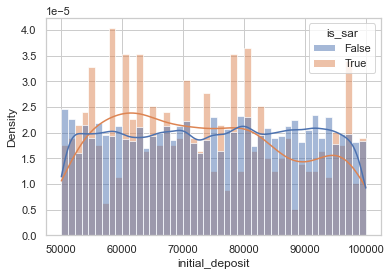

In [18]:


sns.histplot(data=orig_acct, x='initial_deposit', hue='is_sar',
            stat='density', common_norm=False, kde=True)



0         393
1        1230
2         375
3        3541
4        1081
         ... 
88816    7018
88817    5899
88818    4707
88819    1839
88820    3601
Length: 88821, dtype: int16


<AxesSubplot:xlabel='dsply_nm', ylabel='Density'>

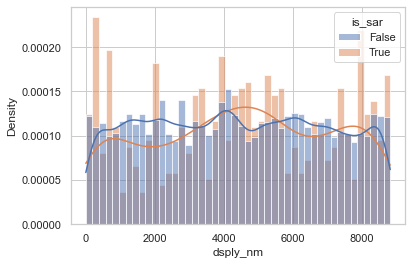

In [19]:
orig_acct['dsply_nm'] = orig_acct.dsply_nm.astype('category')
print(orig_acct['dsply_nm'].cat.codes)
orig_acct['dsply_nm'] = orig_acct['dsply_nm'].cat.codes
sns.histplot(data=orig_acct, x='dsply_nm', hue='is_sar',
             stat='density', common_norm=False, kde=True)


In [20]:
bene_acct = pd.merge(transactions, accounts, how='left',
                     left_on=['bene_acct'], right_on=['acct_id'])
pd.set_option('display.max_columns', None)
bene_acct.head()


,tran_id,orig_acct,bene_acct,tx_type,base_amt,tran_timestamp,is_sar,alert_id,acct_id,dsply_nm,type,acct_stat,acct_rptng_crncy,prior_sar_count,branch_id,open_dt,close_dt,initial_deposit,tx_behavior_id,bank_id,first_name,last_name,street_addr,city,state,country,zip,gender,birth_date,ssn,lon,lat
0,1,3618,2780,TRANSFER,915.43,2017-01-01 00:00:00+00:00,False,-1,2780,ThomasConner,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,82541.65,2,bank_1,Thomas,Conner,8000 Cox Hills,Leviport,CA,US,97128,M,1980-11-06,300-59-7005,NaN,NaN
1,2,2093,2236,TRANSFER,886.43,2017-01-01 00:00:00+00:00,False,-1,2236,AdrienneSmith,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,70335.65,1,bank_1,Adrienne,Smith,213 West Mountains,South Alexchester,RI,US,88903,F,1942-09-02,617-63-1754,NaN,NaN
2,3,4867,2186,TRANSFER,454.24,2017-01-01 00:00:00+00:00,False,-1,2186,DanielleArias,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,99893.28,1,bank_1,Danielle,Arias,962 Warner Parkways,Port Denisehaven,VA,US,42123,F,1963-03-30,382-93-1906,NaN,NaN
3,4,9308,8575,TRANSFER,483.24,2017-01-01 00:00:00+00:00,False,-1,8575,VictoriaRomero,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,72893.99,2,bank_4,Victoria,Romero,840 Brown Pass,Jodimouth,IL,US,85879,F,1962-02-08,822-76-7190,NaN,NaN
4,5,4850,5391,TRANSFER,846.34,2017-01-01 00:00:00+00:00,False,-1,5391,AlexaMiller,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,55601.17,4,bank_2,Alexa,Miller,52930 Shannon Neck,Port Brianstad,CT,US,96639,F,1961-10-05,400-87-7426,NaN,NaN


In [21]:
bene_acct = pd.merge(transactions, accounts, how='left',
                     left_on=['orig_acct'], right_on=['acct_id'])
pd.set_option('display.max_columns', None)
bene_acct.tail()


,tran_id,orig_acct,bene_acct,tx_type,base_amt,tran_timestamp,is_sar,alert_id,acct_id,dsply_nm,type,acct_stat,acct_rptng_crncy,prior_sar_count,branch_id,open_dt,close_dt,initial_deposit,tx_behavior_id,bank_id,first_name,last_name,street_addr,city,state,country,zip,gender,birth_date,ssn,lon,lat
88816,88817,204,8721,TRANSFER,518.06,2017-02-19 00:00:00+00:00,False,-1,204,RichardLee,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,74363.28,1,bank_0,Richard,Lee,23209 Taylor Plaza Apt. 633,West Greggport,NV,US,59577,M,1954-12-18,231-42-7601,NaN,NaN
88817,88818,6291,5101,TRANSFER,345.65,2017-02-19 00:00:00+00:00,False,-1,6291,MeganBlackburn,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,60550.07,1,bank_3,Megan,Blackburn,97641 Cassandra Lodge Apt. 654,Michelletown,TN,US,25146,F,1983-10-21,764-80-0421,NaN,NaN
88818,88819,9442,482,TRANSFER,982.85,2017-02-19 00:00:00+00:00,False,-1,9442,KathrynNovak,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,82324.27,4,bank_4,Kathryn,Novak,472 Brown Crest Apt. 331,Lake Jonathan,NM,US,40836,F,1994-08-15,798-72-8313,NaN,NaN
88819,88820,1573,9960,TRANSFER,448.78,2017-02-19 00:00:00+00:00,False,-1,1573,ColleenMadden,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,84617.53,4,bank_0,Colleen,Madden,61684 Roy Trafficway Apt. 670,Markhaven,AR,US,09432,F,1942-12-01,329-44-5503,NaN,NaN
88820,88821,487,4625,TRANSFER,984.33,2017-02-19 00:00:00+00:00,False,-1,487,JasonWallace,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,54960.55,2,bank_0,Jason,Wallace,7558 Sara Plaza Apt. 362,South Benjamin,OK,US,53686,M,1958-05-30,644-57-9918,NaN,NaN


<AxesSubplot:xlabel='initial_deposit', ylabel='Density'>

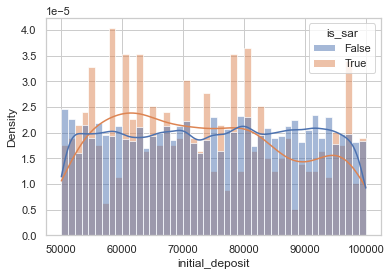

In [22]:
sns.histplot(data=bene_acct, x='initial_deposit', hue='is_sar',
             stat='density', common_norm=False, kde=True)


0         393
1        1230
2         375
3        3541
4        1081
         ... 
88816    7018
88817    5899
88818    4707
88819    1839
88820    3601
Length: 88821, dtype: int16


<AxesSubplot:xlabel='dsply_nm', ylabel='Density'>

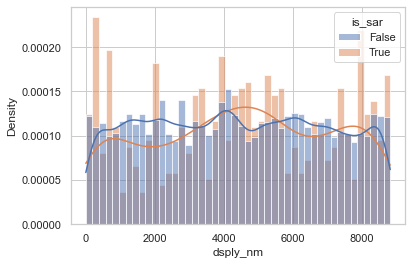

In [23]:
bene_acct['dsply_nm'] = bene_acct.dsply_nm.astype('category')
print(bene_acct['dsply_nm'].cat.codes)
bene_acct['dsply_nm'] = bene_acct['dsply_nm'].cat.codes
sns.histplot(data=bene_acct, x='dsply_nm', hue='is_sar',
             stat='density', common_norm=False, kde=True)


In [24]:
from datetime import datetime, timedelta, time
def timefunc(x):
    start = datetime.combine(x.date(), time.min)
    end = datetime.combine(x.date(), time.max)
    return fake.date_time_between(start_date=start, end_date=end)


transactions['tran_timestamp'] = transactions['tran_timestamp'].apply(timefunc)
transactions


,tran_id,orig_acct,bene_acct,tx_type,base_amt,tran_timestamp,is_sar,alert_id
0,1,3618,2780,TRANSFER,915.43,2017-01-01 16:43:17,False,-1
1,2,2093,2236,TRANSFER,886.43,2017-01-01 01:53:50,False,-1
2,3,4867,2186,TRANSFER,454.24,2017-01-01 18:59:40,False,-1
3,4,9308,8575,TRANSFER,483.24,2017-01-01 13:35:36,False,-1
4,5,4850,5391,TRANSFER,846.34,2017-01-01 07:32:51,False,-1
...,...,...,...,...,...,...,...,...
88816,88817,204,8721,TRANSFER,518.06,2017-02-19 19:48:16,False,-1
88817,88818,6291,5101,TRANSFER,345.65,2017-02-19 05:03:27,False,-1
88818,88819,9442,482,TRANSFER,982.85,2017-02-19 20:12:00,False,-1
88819,88820,1573,9960,TRANSFER,448.78,2017-02-19 21:07:22,False,-1


In [25]:
newtrans = pd.merge(transactions, accounts[['acct_id','branch_id','bank_id']], how='inner', left_on=['orig_acct'], right_on=['acct_id']).rename(columns = {'bank_id': 'orig_bank_id', 'branch_id': 'orig_branch_id'}).drop(columns = 'acct_id')
new2trans = pd.merge(newtrans, accounts[['acct_id','branch_id','bank_id']], how='inner', left_on=['bene_acct'], right_on=['acct_id']).rename(columns = {'bank_id': 'bene_bank_id', 'branch_id': 'bene_branch_id'}).drop(columns = 'acct_id')

In [26]:
new2trans.tran_timestamp.unique()

array(['2017-01-01T16:43:17.000000000', '2017-01-08T04:50:18.000000000',
       '2017-01-08T16:55:46.000000000', ...,
       '2017-01-21T00:28:19.000000000', '2017-01-08T20:12:39.000000000',
       '2017-01-27T06:46:33.000000000'], dtype='datetime64[ns]')

In [27]:
transactions

,tran_id,orig_acct,bene_acct,tx_type,base_amt,tran_timestamp,is_sar,alert_id
0,1,3618,2780,TRANSFER,915.43,2017-01-01 16:43:17,False,-1
1,2,2093,2236,TRANSFER,886.43,2017-01-01 01:53:50,False,-1
2,3,4867,2186,TRANSFER,454.24,2017-01-01 18:59:40,False,-1
3,4,9308,8575,TRANSFER,483.24,2017-01-01 13:35:36,False,-1
4,5,4850,5391,TRANSFER,846.34,2017-01-01 07:32:51,False,-1
...,...,...,...,...,...,...,...,...
88816,88817,204,8721,TRANSFER,518.06,2017-02-19 19:48:16,False,-1
88817,88818,6291,5101,TRANSFER,345.65,2017-02-19 05:03:27,False,-1
88818,88819,9442,482,TRANSFER,982.85,2017-02-19 20:12:00,False,-1
88819,88820,1573,9960,TRANSFER,448.78,2017-02-19 21:07:22,False,-1


In [28]:
newaccounts = accounts.copy()
newaccounts.acct_id = np.tile(np.arange(len(accounts[accounts.bank_id == 'bank_' +str(1)])), 5)
mappingDict = {key: value for (key, value) in zip(accounts.acct_id, newaccounts.acct_id)}

In [29]:
new3trans = new2trans.replace({"orig_acct": mappingDict, "bene_acct": mappingDict})

In [30]:
# for i in range(5):
#     accounts[accounts.bank_id == 'bank_' +
#              str(i)].to_csv('accounts_' + str(i) + '.csv', index=False)
for i in range(5):
    newaccounts[newaccounts.bank_id == 'bank_' +
             str(i)].to_csv('accounts_' + str(i) + '.csv', index=False)


In [31]:
# for i in range(5):
    # transactions[transactions.orig_acct.isin(accounts.acct_id[accounts.bank_id == 'bank_' + str(i)]) | transactions.bene_acct.isin(accounts.acct_id[accounts.bank_id == 'bank_0' + str(i)])].to_csv('transactions_' + str(i) + '.csv', index = False)
for i in range(5):
    new3trans[(new3trans.orig_bank_id == 'bank_' + str(i)) | (new3trans.bene_bank_id == 'bank_' + str(i))].to_csv('transactions_' + str(i) + '.csv', index = False)